## Team Details
1. Team Name: Team 007

2. Team Members: Chun-Kuei Huang, Keira Wang, Kamayani Rai, Ujwala Kavya Jayarama, Tejaswini Deshmukh

3. Executive Summary of Project (10%):
This project focuses on uncovering customer sentiments and trends from Yelp reviews to help businesses stay competitive in an ever-changing market. By employing sentiment analysis and trend detection techniques, the project will highlight evolving customer preferences such as food trends, ambiance expectations, and service quality. These insights will guide businesses in making data-driven decisions to adapt and expand their offerings effectively. Future applications include region-wise analysis to identify localized trends and crafting targeted marketing strategies to expand market reach. A user-friendly visualization will present the results for easy interpretation and actionable insights.

4. Data Sources (10%): <br>
 a. Data sources - https://business.yelp.com/data/resources/open-dataset/ <br>
 The Yelp Open Dataset is a curated collection of real-world Yelp data designed for educational use. It includes information about businesses, such as reviews, photos, check-ins, and various attributes like operating hours, parking availability, and ambience.<br><br>
 b. Filtering/selection criteria applied to the Yelp data
      - Location - Arizona, California
      - Categories - Restaurants and Breakfasts

 c. Provide the descriptions and links of the external data sources - External data has not been used

In [ ]:
# Import necessary libraries for AWS, JSON handling, and data manipulation.
# List the data sources
import boto3
import json
import pandas as pd

# S3 client setup
s3 = boto3.client('s3')

# Define the S3 bucket and file key
bucket_name = 'amazon-sagemaker-058264306111-us-east-1-e23504aef6c5'
file_key = 'dzd_5l5kah6gnsnq3r/4ybehwgzqcyw87/dev/yelp_academic_dataset_business.json'

# Fetch the file from S3
response = s3.get_object(Bucket=bucket_name, Key=file_key)

# Read the file content line by line
lines = response['Body'].read().decode('utf-8').splitlines()

# Parse each line safely and collect valid JSON objects
valid_data = []
invalid_lines = []

for i, line in enumerate(lines):
    try:
        valid_data.append(json.loads(line))
    except json.JSONDecodeError:
        invalid_lines.append((i, line))  # Record the line index and content for debugging

# Convert the valid data into a pandas DataFrame
df_business = pd.DataFrame(valid_data)

print(f"Number of valid lines: {len(valid_data)}")
print(f"Number of invalid lines: {len(invalid_lines)}")

# Debug invalid lines (optional)
for index, content in invalid_lines[:5]:  # Show only the first 5 invalid lines
    print(f"Invalid line {index}: {content}")

# delete rows with missing values
df_business = df_business.dropna()
df_business

Number of valid lines: 150346
Number of invalid lines: 0


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."
5,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,1,"{'BusinessParking': 'None', 'BusinessAcceptsCr...","Burgers, Fast Food, Sandwiches, Food, Ice Crea...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-22:0', '..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150340,hn9Toz3s-Ei3uZPt7esExA,West Side Kebab House,2470 Guardian Road NW,Edmonton,AB,T5T 1K8,53.509649,-113.675999,4.5,18,0,"{'Ambience': '{'touristy': False, 'hipster': F...","Middle Eastern, Restaurants","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
150341,IUQopTMmYQG-qRtBk-8QnA,Binh's Nails,3388 Gateway Blvd,Edmonton,AB,T6J 5H2,53.468419,-113.492054,3.0,13,1,"{'ByAppointmentOnly': 'False', 'RestaurantsPri...","Nail Salons, Beauty & Spas","{'Monday': '10:0-19:30', 'Tuesday': '10:0-19:3..."
150342,c8GjPIOTGVmIemT7j5_SyQ,Wild Birds Unlimited,2813 Bransford Ave,Nashville,TN,37204,36.115118,-86.766925,4.0,5,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Pets, Nurseries & Gardening, Pet Stores, Hobby...","{'Monday': '9:30-17:30', 'Tuesday': '9:30-17:3..."
150344,mtGm22y5c2UHNXDFAjaPNw,Cyclery & Fitness Center,2472 Troy Rd,Edwardsville,IL,62025,38.782351,-89.950558,4.0,24,1,"{'BusinessParking': '{'garage': False, 'street...","Fitness/Exercise Equipment, Eyewear & Optician...","{'Monday': '9:0-20:0', 'Tuesday': '9:0-20:0', ..."


In [ ]:
# S3 client setup
s3 = boto3.client('s3')

# Define the S3 bucket and file key
bucket_name = 'amazon-sagemaker-058264306111-us-east-1-e23504aef6c5'
file_key = 'dzd_5l5kah6gnsnq3r/4ybehwgzqcyw87/dev/yelp_academic_dataset_review.json'

# Fetch the file from S3
response = s3.get_object(Bucket=bucket_name, Key=file_key)

# Read the file content line by line
lines = response['Body'].read().decode('utf-8').splitlines()

# Parse each line safely and collect valid JSON objects
valid_data = []
invalid_lines = []

for i, line in enumerate(lines):
    try:
        valid_data.append(json.loads(line))
    except json.JSONDecodeError:
        invalid_lines.append((i, line))  # Record the line index and content for debugging

# Convert the valid data into a pandas DataFrame
df_reviews = pd.DataFrame(valid_data)

print(f"Number of valid lines: {len(valid_data)}")
print(f"Number of invalid lines: {len(invalid_lines)}")

# Debug invalid lines (optional)
for index, content in invalid_lines[:5]:  # Show only the first 5 invalid lines
    print(f"Invalid line {index}: {content}")

# delete rows with missing values
df_reviews = df_reviews.dropna()
df_reviews

Number of valid lines: 403457
Number of invalid lines: 1
Invalid line 403457: {"review_id":"tlju28FsTQW1G8ufNdld7g","user_id":"2w_sTGEe1WIypfm_vuKG1Q","business_id":"UhSVDwQFW6mKmaEA5OTU7A","stars":5.0,"useful":0,"funny":0,"cool":0,"text":"I've been going to SKH for many years and it still remains one of my favorite places. It's not fancy by any means, but don't let that deter you because the food is amazing. The chicken kabobs are probably the best I've ever had! I pretty much get it everytime I go. The chabli kabob is also amazing. The meat in both of these dishes is tender and loaded with flavor. However, I would skip on the beef and lamb kabobs because the meat is a little too chewy and they don't taste as good in comparison. Also don't miss out on the bulani, burani and hummus appetizers, which are also incredibly delicious. The hummus is also super tasty and goes great with the Afghani bread they give you. If you go during the day, ask if you can have the cucumber salad instead, 

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15
...,...,...,...,...,...,...,...,...,...
403452,FlUrXqtc9ncfzRRG50ckHg,78-yZaCwGvZcUGHAKZeKEg,a1u9Bxrq_fZxl2pgqQUcJA,1.0,0,0,0,Very slow service. Food is okay. Very loud res...,2019-04-06 17:38:02
403453,k-PVSZ__X628-WwRc_QKDw,dRqk_keQnX0I6cVwUb4xLw,MquXDiKxHB4NYv5r5KodOQ,1.0,1,0,0,Came in on a Saturday in the early evening. It...,2019-05-11 22:32:15
403454,y1m4mBlUyBmbbfV7OuNLhg,22Xtj2AoMkLL8X-kJX1Ezg,TN3tMGLb6AbAnN6rFKmH1A,5.0,0,0,0,"To begin, the service here was great. The owne...",2016-04-08 04:07:05
403455,4uzFGb-3-nLuyN6f0E-Iuw,iaf-N6mTbQnfMtEN2wJGiA,g9L4Y9EgNzcj77zQkXK1rA,5.0,1,0,0,Always able to get an appointment for a massag...,2015-07-30 23:33:20


In [ ]:
df_business_AZ_CA = df_business[df_business["state"].astype(str).isin(["AZ", "CA"])]
df_business_new = df_business_AZ_CA[
    df_business_AZ_CA["state"].astype(str).isin(["AZ", "CA"]) &
    df_business_AZ_CA["categories"].astype(str).str.contains("Restaurants", case=False, na=False) &
    df_business_AZ_CA["categories"].astype(str).str.contains("Breakfast", case=False, na=False)
]
df_business_new

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
85,IDtLPgUrqorrpqSLdfMhZQ,Helena Avenue Bakery,"131 Anacapa St, Ste C",Santa Barbara,CA,93101,34.414445,-119.690672,4.0,389,1,"{'RestaurantsTakeOut': 'True', 'NoiseLevel': '...","Food, Restaurants, Salad, Coffee & Tea, Breakf...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-14:0', '..."
968,3swM60bulnut1d4AZti80Q,Rockabilly Grill,3700 N Oracle Rd,Tucson,AZ,85705,32.273989,-110.977534,3.5,37,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsDel...","Nightlife, American (New), Music Venues, Resta...","{'Monday': '10:0-2:0', 'Tuesday': '10:0-2:0', ..."
1141,wgcSbX3osqRibWW7pVyfww,Jack in the Box,1202 W St Marys Rd,Tucson,AZ,85745,32.229850,-110.990060,2.0,13,1,"{'Alcohol': 'u'none'', 'RestaurantsGoodForGrou...","Burgers, Fast Food, Restaurants, Breakfast & B...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
1191,i8UZblHPk2O-iNKJrnWQ_Q,Taco Bell,8578 East Broadway Blvd,Tucson,AZ,85710,32.220539,-110.809269,2.5,26,1,"{'HasTV': 'True', 'GoodForKids': 'True', 'Alco...","Restaurants, Fast Food, Mexican, Tex-Mex, Taco...","{'Monday': '7:0-2:0', 'Tuesday': '7:0-2:0', 'W..."
1750,bc3K8KvLkLNu_XU3RkeeeA,LeBuzz Caffe,"2930 N Swan Rd, Ste 127",Tucson,AZ,85712,32.260933,-110.891826,4.0,33,1,"{'WiFi': 'u'free'', 'OutdoorSeating': 'True', ...","Breakfast & Brunch, Restaurants, Salad, Sandwi...","{'Monday': '6:0-14:0', 'Tuesday': '6:0-14:0', ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149307,hDr_bt6MEwlGvGCCKzyzhg,Goleta Coffee Co and Loca Vivant Kitchen,177 S Turnpike Rd,Santa Barbara,CA,93111,34.437517,-119.790939,4.0,187,1,"{'RestaurantsPriceRange2': '1', 'BusinessParki...","Restaurants, Coffee & Tea, Breakfast & Brunch,...","{'Monday': '0:0-0:0', 'Tuesday': '7:0-15:0', '..."
149932,qhoPBAD0RP6F9bWKo6mjcA,Mutts Premium Hot Dogs & Sausages,"806 E University Blvd, Ste 16",Tucson,AZ,85719,32.231317,-110.958950,3.5,49,0,"{'BikeParking': 'True', 'RestaurantsGoodForGro...","Food, Restaurants, Breakfast & Brunch, America...","{'Monday': '0:0-0:0', 'Tuesday': '7:30-15:0', ..."
150000,aGOXuqO6yhN66tLYI61Thg,Jack in the Box,4450 1st Ave,Tucson,AZ,85719,32.287556,-110.960460,4.5,13,1,"{'DriveThru': 'True', 'Caters': 'False', 'Bike...","Tacos, American (Traditional), Fast Food, Mexi...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
150009,sOjbtBWo-m6rpjHv4tA_oQ,Brewd Coffee & Food,4960 N Sabino Canyon Rd,Tucson,AZ,85750,32.297383,-110.823669,4.0,112,0,"{'RestaurantsPriceRange2': '1', 'HasTV': 'True...","Food, Bakeries, Restaurants, Sandwiches, Break...","{'Monday': '0:0-0:0', 'Tuesday': '7:0-12:0', '..."


**Link to Yelp's open dataset**

<h1 style="font-size:20px; line-height:1.5; padding:10px;">
    <b>
        <a href="https://business.yelp.com/data/resources/open-dataset/" target="_blank" style="text-decoration: none; color: inherit;">
            Link: https://business.yelp.com/data/resources/open-dataset/" target="_blank" style="text-decoration: none; color: inherit
        </a>
    </b>
<h1 style="font-size:15px; line-height:1.5; padding:10px;">
<b>Description: The Yelp Open Dataset is a curated collection of real-world Yelp data designed for educational use. It includes information about businesses, such as reviews, photos, check-ins, and various attributes like operating hours, parking availability, and ambience.</b>
</h>

In [ ]:
# Merge reviews with business state information based on business_id.
df_reviews_merged = df_reviews.merge(df_business[['business_id', 'state']], on="business_id", how="left")

# Count number of reviews per state
review_counts = df_reviews_merged['state'].value_counts()

print(f"Arizona (AZ) Reviews: {review_counts.get('AZ', 0)}")
print(f"California (CA) Reviews: {review_counts.get('CA', 0)}")


Arizona (AZ) Reviews: 19781
California (CA) Reviews: 18174


In [ ]:
# Import nltk and Counter for text processing.
import nltk
from collections import Counter


nltk.download('punkt')
num_reviews = df_reviews.shape[0]
print(f"Total number of reviews: {num_reviews}")

Total number of reviews: 403457


[nltk_data] Downloading package punkt to /home/sagemaker-
[nltk_data]     user/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# Tokenize the review text for each review and display the first few examples.
df_reviews['tokens'] = df_reviews['text'].apply(nltk.word_tokenize)
print(df_reviews[['text', 'tokens']].head())

                                                text  \
0  If you decide to eat here, just be aware it is...   
1  I've taken a lot of spin classes over the year...   
2  Family diner. Had the buffet. Eclectic assortm...   
3  Wow!  Yummy, different,  delicious.   Our favo...   
4  Cute interior and owner (?) gave us tour of up...   

                                              tokens  
0  [If, you, decide, to, eat, here, ,, just, be, ...  
1  [I, 've, taken, a, lot, of, spin, classes, ove...  
2  [Family, diner, ., Had, the, buffet, ., Eclect...  
3  [Wow, !, Yummy, ,, different, ,, delicious, .,...  
4  [Cute, interior, and, owner, (, ?, ), gave, us...  


In [ ]:
# Calculating total token count, unique word count, average review length, and number of unique customers.
total_tokens = sum(df_reviews['tokens'].apply(len))
unique_words = set(word.lower() for review in df_reviews['tokens'] for word in review)
num_unique_words = len(unique_words)
avg_review_length = total_tokens / num_reviews
num_unique_customers = df_reviews['user_id'].nunique()
num_businesses = df_reviews['business_id'].nunique()
print(f"Total tokens (words): {total_tokens}")
print(f"Number of unique words (vocabulary size): {num_unique_words}")
print(f"Average review length: {avg_review_length:.2f} words")
print(f"Number of unique customers: {num_unique_customers}")
print(f"Total number of businesses: {num_businesses}")

Total tokens (words): 47411386
Number of unique words (vocabulary size): 211882
Average review length: 117.51 words
Number of unique customers: 262502
Total number of businesses: 13838


In [ ]:
pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


## 6. Data Evaluation:

1. Why the selected data (e.g., reviews/customers/business/regions) are suitable for answering your business questions.<br>

**Arizona (AZ) and California (CA)** were selected due to their high Yelp engagement and diverse market conditions, making them ideal for analyzing restaurant and breakfast-related reviews. Our dataset includes **19,781 reviews from Arizona** and **18,174 reviews from California**, ensuring a statistically meaningful sample size for evaluating customer preferences and satisfaction.

California is home to one of the largest metropolitan areas in the U.S., contributing to a highly competitive restaurant industry, where businesses must differentiate themselves to attract customers. Meanwhile, Arizona's distinct dining culture, particularly its emphasis on outdoor seating and breakfast preferences, provides a unique contrast. By analyzing these two states, we can uncover key factors influencing customer satisfaction, such as pricing strategies, service quality, and dining experience, and derive insights that are broadly applicable to similar markets.<br> <br>

------------------------------------------------------

2. Whether the sample size is appropriate, and why<br> - The original Yelp dataset has 117,618 businesses, but after filtering for breakfast and restaurants in Arizona and California, we’re left with **462 data points**. That’s only about **0.39%** of the original data.
It might seem too small to be representative. But we had only a few thousand entries matching our criteria, then 462 could be a reasonable, it’s still useful for exploratory data analysis (EDA) and identifying key trends.

------------------------------------------------------

3.Whether the selected data could be biased in certain dimension in your analysis.<br>

The selected data could be biased due to geographical imbalance and category constraints:
- **Geographical Bias**: More reviews from AZ (19,781) than CA (18,174) could skew insights toward Arizona’s customer preferences.
- **Category Bias**: The dataset includes only 303 businesses in AZ and 159 in CA categorized as restaurants & breakfast, which may not fully represent broader dining trends.
- **Sentiment Bias**: Reviews on platforms like Yelp tend to be extreme (highly positive or negative), potentially distorting the overall sentiment analysis.

-------------------------------------------------------

4. The potential challenges to process the data.<br>
  - Since the dataset is large, memory and pricing bottlenecks can slow down operations,especially during NLP tasks like tokenization.<br>
  - Another major issue is that the data for Arizona(19,718 rows) and California(18,174 rows) are not equal which lead to biased results.<br>
  - The number of business categories available for processing such as restaurant, bars, breakfast places, etc were limited, which could restrict analysis depth.

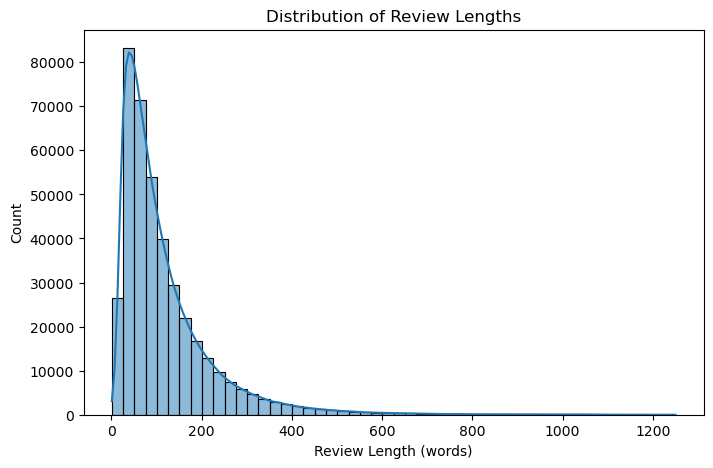

In [ ]:
# Import matplotlib and seaborn for plotting.
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of review lengths
plt.figure(figsize=(8, 5))
sns.histplot(df_reviews['tokens'].apply(len), bins=50, kde=True)
plt.xlabel("Review Length (words)")  # X-axis label
plt.ylabel("Count")  # Y-axis label
plt.title("Distribution of Review Lengths")  # Chart title
plt.show()

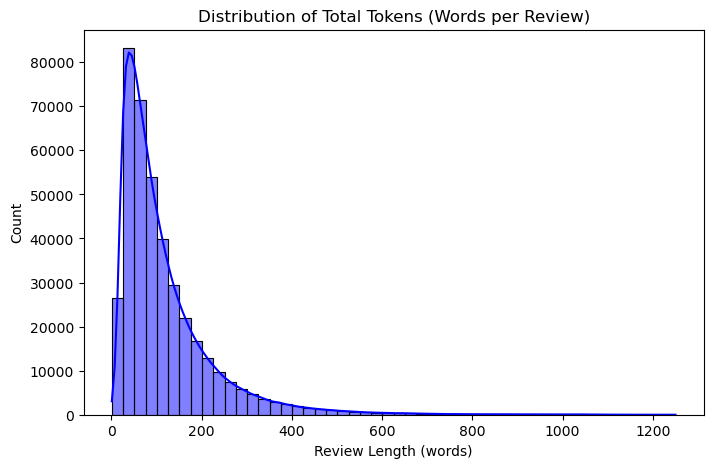

In [ ]:
# Ploting a histogram showing the distribution of review lengths (in words).
plt.figure(figsize=(8, 5))
sns.histplot(df_reviews['tokens'].apply(len), bins=50, kde=True, color="blue")
plt.xlabel("Review Length (words)")
plt.ylabel("Count")
plt.title("Distribution of Total Tokens (Words per Review)")
plt.show()

In [ ]:
pip install wordcloud

  Using cached wordcloud-1.9.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.4 kB)
Using cached wordcloud-1.9.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (547 kB)
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Import additional NLTK modules for further text processing including stopwords and lemmatization.
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Load stopwords
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Function to preprocess text
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    tokens = word_tokenize(text)  # Tokenize words
    tokens = [word for word in tokens if word.isalpha()]  # Remove punctuation
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatization
    return tokens

# Apply preprocessing to Yelp reviews
df_reviews['processed_text'] = df_reviews['text'].apply(preprocess_text)

# Show sample processed text
df_reviews[['text', 'processed_text']].head()

[nltk_data] Downloading package stopwords to /home/sagemaker-
[nltk_data]     user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/sagemaker-
[nltk_data]     user/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/sagemaker-
[nltk_data]     user/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,text,processed_text
0,"If you decide to eat here, just be aware it is...","[decide, eat, aware, going, take, hour, beginn..."
1,I've taken a lot of spin classes over the year...,"[taken, lot, spin, class, year, nothing, compa..."
2,Family diner. Had the buffet. Eclectic assortm...,"[family, diner, buffet, eclectic, assortment, ..."
3,"Wow! Yummy, different, delicious. Our favo...","[wow, yummy, different, delicious, favorite, l..."
4,Cute interior and owner (?) gave us tour of up...,"[cute, interior, owner, gave, u, tour, upcomin..."


In [ ]:
# Printing the columns of the business DataFrame to verify available data.
print(df_business.columns)

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours'],
      dtype='object')


In [ ]:
# Convert the 'attributes' column from a string representation to a dictionary.
import ast

df_business['attributes'] = df_business['attributes'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)


df_attributes = df_business['attributes'].apply(pd.Series)

df_business = pd.concat([df_business, df_attributes], axis=1)


print(df_attributes.head())


  BusinessAcceptsCreditCards BikeParking RestaurantsPriceRange2 CoatCheck  \
1                       True         NaN                    NaN       NaN   
2                       True        True                      2     False   
3                      False        True                      1       NaN   
4                       True        True                    NaN       NaN   
5                       True       False                      1     False   

  RestaurantsTakeOut RestaurantsDelivery Caters     WiFi  \
1                NaN                 NaN    NaN      NaN   
2              False               False  False    u'no'   
3               True               False   True  u'free'   
4               True                 NaN  False      NaN   
5               True                True  False    u'no'   

                                     BusinessParking WheelchairAccessible  \
1                                                NaN                  NaN   
2  {'garage': False, '

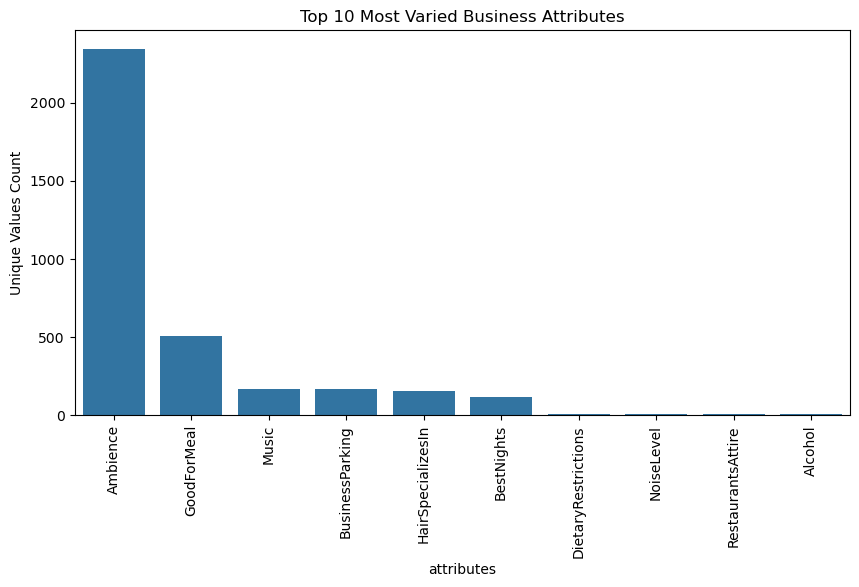

In [ ]:
# Analyze unique attribute counts by computing the number of unique values per attribute.

attribute_counts = df_attributes.nunique().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=attribute_counts.index[:10], y=attribute_counts.values[:10])
plt.xticks(rotation=90)
plt.xlabel("attributes")
plt.ylabel("Unique Values Count")
plt.title("Top 10 Most Varied Business Attributes")
plt.show()


**Preliminary Data Exploration Comment**
- Among business attributes, "Ambience" shows the most variation, reflecting the wide range of atmospheres businesses create, from casual and family-friendly to romantic settings. Other attributes with significant differences include "GoodForMeal," "Music," and "BusinessParking," indicating that customers often consider these factors when choosing a place. In contrast, attributes like "NoiseLevel," "RestaurantsAttire," and "Alcohol" have less variability, suggesting that businesses follow more standardized practices in these areas.

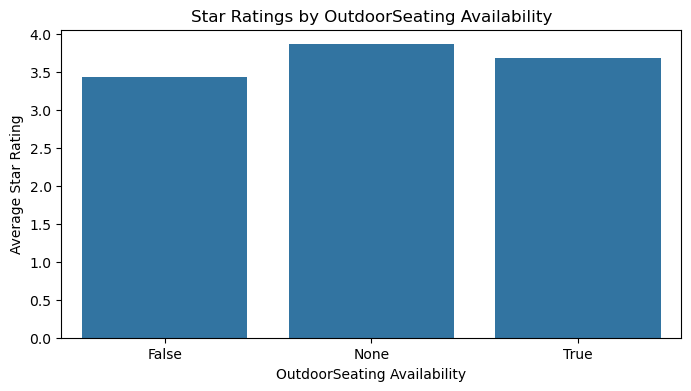

In [ ]:
# Calculate average star ratings grouped by 'OutdoorSeating' attribute and plot a bar chart.
attribute_ratings = df_business.groupby('OutdoorSeating')['stars'].mean().dropna()


plt.figure(figsize=(8, 4))
sns.barplot(x=attribute_ratings.index, y=attribute_ratings.values)
plt.xlabel("OutdoorSeating Availability")
plt.ylabel("Average Star Rating")
plt.title("Star Ratings by OutdoorSeating Availability")
plt.show()

**Preliminary Data Exploration Comment**
- Businesses with outdoor seating tend to have higher average ratings than those without. Interestingly, establishments that don't specify outdoor seating seem to have the highest ratings, possibly because they are higher-end restaurants that don’t need to highlight seating arrangements. On the other hand, businesses without outdoor seating have slightly lower ratings, suggesting that customers may prefer having the option to dine outdoors.

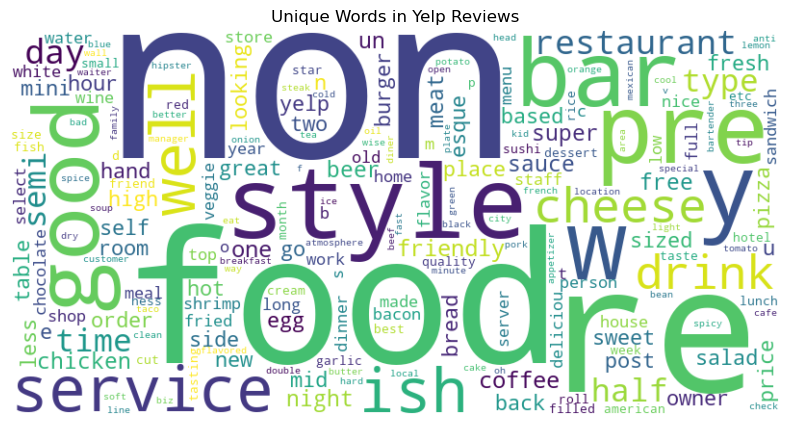

In [ ]:
# Import WordCloud to generate a word cloud visualization.
from wordcloud import WordCloud

# Generating word cloud using all unique words extracted from reviews.
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(unique_words))

# Plot word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Hide axes
plt.title("Unique Words in Yelp Reviews")
plt.show()

**Preliminary Data Exploration Comment**
- Yelp reviews frequently mention words like "food," "service," "restaurant," "cheese," "drink," "friendly," and "good," highlighting a strong focus on both dining experience and customer interactions. Terms like "friendly," "staff," "nice," and "great" suggest that service quality plays a key role in customer feedback. Additionally, the frequent appearance of "burger," "pizza," "drink," and "bread" indicates that certain food categories are particularly popular topics. Overall, reviews tend to center around food quality and service, with specific dishes and customer interactions shaping the conversation.

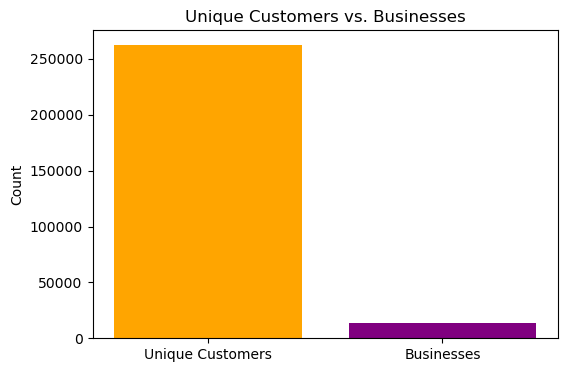

In [ ]:
# Plotting a bar chart comparing the number of unique customers versus businesses.
plt.figure(figsize=(6, 4))
plt.bar(["Unique Customers", "Businesses"], [num_unique_customers, num_businesses], color=["orange", "purple"])
plt.ylabel("Count")
plt.title("Unique Customers vs. Businesses")
plt.show()

**Preliminary Data Exploration Comment**
- If the number of unique customers is significantly higher than the number of businesses, it suggests that most customers have reviewed multiple businesses rather than just one. This could indicate that Yelp users tend to explore different places rather than consistently visiting the same ones.

In [ ]:
from collections import Counter

# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Load English stopwords
stop_words = set(stopwords.words('english'))

# Initialize WordNet Lemmatizer
lemmatizer = nltk.WordNetLemmatizer()

# Function for text preprocessing
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    tokens = word_tokenize(text)  # Tokenize words
    tokens = [word for word in tokens if word.isalpha()]  # Remove punctuation
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatization
    return tokens

# Apply preprocessing to reviews
df_reviews['processed_text'] = df_reviews['text'].apply(preprocess_text)

# Display sample processed text
df_reviews[['text', 'processed_text']].head()

[nltk_data] Downloading package stopwords to /home/sagemaker-
[nltk_data]     user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/sagemaker-
[nltk_data]     user/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/sagemaker-
[nltk_data]     user/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,text,processed_text
0,"If you decide to eat here, just be aware it is...","[decide, eat, aware, going, take, hour, beginn..."
1,I've taken a lot of spin classes over the year...,"[taken, lot, spin, class, year, nothing, compa..."
2,Family diner. Had the buffet. Eclectic assortm...,"[family, diner, buffet, eclectic, assortment, ..."
3,"Wow! Yummy, different, delicious. Our favo...","[wow, yummy, different, delicious, favorite, l..."
4,Cute interior and owner (?) gave us tour of up...,"[cute, interior, owner, gave, u, tour, upcomin..."


In [ ]:
# Flatten the list of tokenized words from all reviews and count the frequency of each word.
all_words = [word for tokens in df_reviews['processed_text'] for word in tokens]

# Count word frequencies
word_freq = Counter(all_words)

# Show top 10 most common words
print("Top 10 most common words in Yelp reviews:")
print(word_freq.most_common(10))

Top 10 most common words in Yelp reviews:
[('food', 221051), ('place', 214564), ('good', 203636), ('great', 187210), ('time', 154401), ('service', 134948), ('like', 127539), ('get', 126677), ('one', 125454), ('would', 120903)]


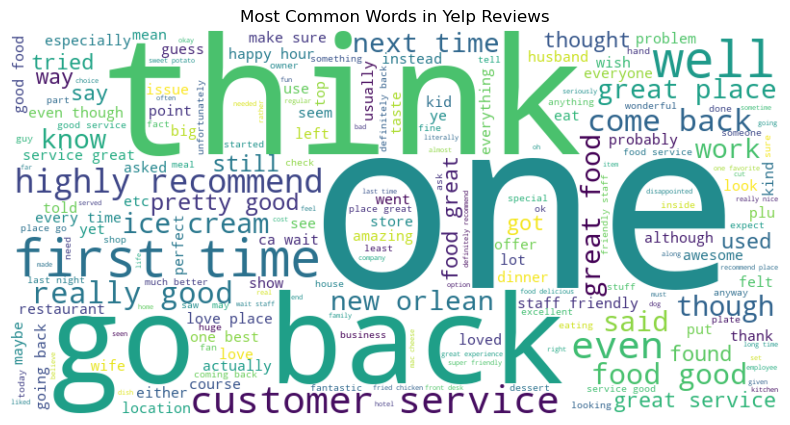

In [ ]:
# Generating a word cloud from the flattened list of all words.
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(all_words))

# Plot word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Hide axes
plt.title("Most Common Words in Yelp Reviews")
plt.show()

**Preliminary Data Exploration Comment**
- The number of unique customers far exceeds the number of businesses, indicating that many users leave reviews for multiple establishments. This suggests a highly active Yelp user base, where a relatively small number of businesses receive a large volume of reviews. Given this high level of engagement, businesses need to be proactive in managing their online reputation, as their ratings are influenced by a broad and diverse range of customer feedback.

In [ ]:
from nltk.util import ngrams

# Generating bigrams (two-word combinations) from the flattened list of all words
bigrams = list(ngrams(all_words, 2))

# Count bigram frequencies
bigram_freq = Counter(bigrams)

# Show top 10 most common bigrams
print("Top 10 most common bigrams in Yelp reviews:")
print(bigram_freq.most_common(10))

Top 10 most common bigrams in Yelp reviews:
[(('go', 'back'), 17786), (('first', 'time'), 15868), (('customer', 'service'), 15080), (('highly', 'recommend'), 14606), (('come', 'back'), 13325), (('really', 'good'), 12582), (('food', 'good'), 11726), (('ice', 'cream'), 11145), (('great', 'place'), 10741), (('new', 'orleans'), 10346)]


**Proposed Solution**
- Our analysis combines NMF (Non-negative Matrix Factorization) for topic modeling and machine learning (Logistic Regression / SGD SVM) for sentiment analysis.

**Topic Modeling (NMF):**
* Preprocessed Yelp reviews (lowercasing, removing stopwords, lemmatization).

* Applied TF-IDF to convert text into numerical features.

* Used NMF to identify 5 key topics: Food Quality, Service Quality, Pricing,
  Ambiance, and Wait Time.

* Visualized topic distribution to see which aspects are most discussed.

**Sentiment Analysis (Logistic Regression / SGD SVM):**
* Labeled reviews as positive (4-5 stars) or negative (1-2 stars).

* Converted text using TF-IDF and split data into training/testing sets.

* Trained Logistic Regression & SGD SVM, both achieving ~95% accuracy.

* Analyzed sentiment per topic, revealing Service Quality has the highest
  positive sentiment, while Pricing has the lowest.

* This approach helps businesses understand customer concerns, monitor  
  trends, and make data-driven decisions.

In [ ]:
# Preview the processed text for reviews to verify preprocessing.
print(df_reviews['processed_text'].head())

0    [decide, eat, aware, going, take, hour, beginn...
1    [taken, lot, spin, class, year, nothing, compa...
2    [family, diner, buffet, eclectic, assortment, ...
3    [wow, yummy, different, delicious, favorite, l...
4    [cute, interior, owner, gave, u, tour, upcomin...
Name: processed_text, dtype: object


In [ ]:
# Define a text preprocessing function to standardize review text.
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    tokens = word_tokenize(text)  # Tokenize the text into words
    tokens = [word for word in tokens if word.isalpha()]  # Remove punctuation
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Apply lemmatization
    return " ".join(tokens)  # Convert list of words back to a single string

In [ ]:
# Apply the preprocessing function to the review text and store the result in a new column.
df_reviews['processed_text'] = df_reviews['text'].apply(preprocess_text)

Here, transformation is being done for the processed text into numerical features using the TF-IDF (Term Frequency-Inverse Document Frequency) vectorization technique. The vectorizer is set to consider the 5000 most important words, reducing dimensionality while retaining meaningful information. The transformed text data is stored in a sparse matrix format, which is ideal for efficient computation in machine learning models.

In [ ]:
# Import and initialize TfidfVectorizer to transform text data into TF-IDF features.
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=5000)  # Limit vocabulary size to 5000 most important words

# Convert processed text into TF-IDF vectors
X = vectorizer.fit_transform(df_reviews['processed_text'])

# Displaying shape of transformed data
print(f"TF-IDF matrix shape: {X.shape}")  # Should be (num_reviews, 5000)

# Showing sample features
feature_names = vectorizer.get_feature_names_out()
print(f"Sample TF-IDF features: {feature_names[:10]}")

TF-IDF matrix shape: (403457, 5000)
Sample TF-IDF features: ['ability' 'able' 'absolute' 'absolutely' 'abundance' 'ac' 'acai' 'accent'
 'accept' 'acceptable']


In [ ]:
import numpy as np

# Define sentiment labels (Three-class classification)
df_reviews['sentiment'] = df_reviews['stars'].apply(lambda x: 2 if x >= 4 else (1 if x == 3 else 0))  # 2=Positive, 1=Neutral, 0=Negative

# Check distribution
print(df_reviews['sentiment'].value_counts())


sentiment
2    278861
0     80378
1     44218
Name: count, dtype: int64


In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Load stopwords
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Function to preprocess text
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    tokens = word_tokenize(text)  # Tokenize words
    tokens = [word for word in tokens if word.isalpha()]  # Remove punctuation
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatization
    return tokens

# Apply preprocessing to Yelp reviews
df_reviews['processed_text'] = df_reviews['text'].apply(preprocess_text)

# Show sample processed text
df_reviews[['text', 'processed_text']].head()

[nltk_data] Downloading package stopwords to /home/sagemaker-
[nltk_data]     user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/sagemaker-
[nltk_data]     user/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/sagemaker-
[nltk_data]     user/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,text,processed_text
0,"If you decide to eat here, just be aware it is...","[decide, eat, aware, going, take, hour, beginn..."
1,I've taken a lot of spin classes over the year...,"[taken, lot, spin, class, year, nothing, compa..."
2,Family diner. Had the buffet. Eclectic assortm...,"[family, diner, buffet, eclectic, assortment, ..."
3,"Wow! Yummy, different, delicious. Our favo...","[wow, yummy, different, delicious, favorite, l..."
4,Cute interior and owner (?) gave us tour of up...,"[cute, interior, owner, gave, u, tour, upcomin..."


In [ ]:
# define sentiment labels for a three-class sentiment classification: 2 = Positive (4 or 5 stars), 1 = Neutral (3 stars), 0 = Negative (1 or 2 stars).
df_reviews = df_reviews[df_reviews['stars'] != 3]  # Remove 3-star reviews
df_reviews['sentiment'] = np.where(df_reviews['stars'] >= 4, 1, 0)  # 1 = positive, 0 = negative

# Convert processed text (list) to space-separated strings
df_reviews['processed_text_str'] = df_reviews['processed_text'].apply(lambda x: " ".join(x))

# Recompute TF-IDF on filtered data
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df_reviews['processed_text_str'])

# Check the number of samples
print(f"TF-IDF shape: {X.shape}")
print(f"Sentiment labels: {df_reviews.shape[0]}")

TF-IDF shape: (359239, 5000)
Sentiment labels: 359239


In [ ]:
from sklearn.model_selection import train_test_split
# Ensure X and y have the same number of samples
if X.shape[0] != df_reviews.shape[0]:
    print("Mismatch detected! Adjusting dataset...")
    df_reviews = df_reviews.iloc[:X.shape[0]]  # Trim to match TF-IDF matrix size

# Perform a train-test split on the TF-IDF features and sentiment labels.
X_train, X_test, y_train, y_test = train_test_split(X, df_reviews['sentiment'], test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} reviews")
print(f"Test set size: {X_test.shape[0]} reviews")

Training set size: 287391 reviews
Test set size: 71848 reviews


In [ ]:
from sklearn.linear_model import LogisticRegression

# Train logistic regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predict on test set
y_pred = log_reg.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.95
Precision: 0.96
Recall: 0.98
F1 Score: 0.97


In [ ]:
from sklearn.linear_model import SGDClassifier

# Train SGD-based SVM model (much faster)
sgd_svm = SGDClassifier(loss='hinge', max_iter=1000, tol=1e-3)  # Hinge loss = SVM
sgd_svm.fit(X_train, y_train)

# Predict on test set
y_pred_sgd_svm = sgd_svm.predict(X_test)

# Evaluate
accuracy_sgd = accuracy_score(y_test, y_pred_sgd_svm)
print(f"SGD SVM Accuracy: {accuracy_sgd:.2f}")


SGD SVM Accuracy: 0.95


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Evaluate SGD SVM model performance
precision_sgd = precision_score(y_test, y_pred_sgd_svm)
recall_sgd = recall_score(y_test, y_pred_sgd_svm)
f1_sgd = f1_score(y_test, y_pred_sgd_svm)

print(f"SGD SVM Precision: {precision_sgd:.2f}")
print(f"SGD SVM Recall: {recall_sgd:.2f}")
print(f"SGD SVM F1 Score: {f1_sgd:.2f}")


SGD SVM Precision: 0.95
SGD SVM Recall: 0.98
SGD SVM F1 Score: 0.97


In [ ]:
import pandas as pd

# Create a DataFrame to compare model performance
comparison_df = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score"],
    "Logistic Regression": [accuracy, precision, recall, f1],
    "SGD SVM": [accuracy_sgd, precision_sgd, recall_sgd, f1_sgd]
})

# Display the comparison table
print(comparison_df)


      Metric  Logistic Regression   SGD SVM
0   Accuracy             0.953249  0.947793
1  Precision             0.963311  0.951526
2     Recall             0.976890  0.982708
3   F1 Score             0.970053  0.966865


In [ ]:
# Import NMF and reinitialize TfidfVectorizer with English stopwords for topic modeling.
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer


vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_tfidf = vectorizer.fit_transform(df_reviews['processed_text_str'])

num_topics = 5
nmf_model = NMF(n_components=num_topics, random_state=42)
W = nmf_model.fit_transform(X_tfidf)
H = nmf_model.components_

feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(H):
    print(f"\nTopic {topic_idx+1}:")
    print(", ".join([feature_names[i] for i in topic.argsort()[:-11:-1]]))


Topic 1:
chicken, good, delicious, burger, ordered, salad, sauce, cheese, place, sandwich

Topic 2:
great, place, friendly, staff, love, beer, atmosphere, amazing, awesome, recommend

Topic 3:
time, room, like, minute, day, order, got, customer, went, said

Topic 4:
pizza, crust, good, cheese, topping, delivery, salad, order, slice, sauce

Topic 5:
food, good, service, restaurant, excellent, price, fast, time, mexican, server


In [ ]:
# After fitting NMF (not shown), assign a topic to each review based on the highest weight in W.
df_reviews['topic'] = np.argmax(W, axis=1)
df_reviews['topic'].value_counts()

topic
2    128602
0     88039
1     83724
4     43982
3     14892
Name: count, dtype: int64

**Here**, we have made use of Non-negative Matrix Factorization (NMF) for topic modeling on Yelp reviews. The model identifies five main topics based on frequently occurring words in the text. Each topic is represented by a set of keywords, revealing insights such as food quality, service, pricing, ambiance, and wait times.

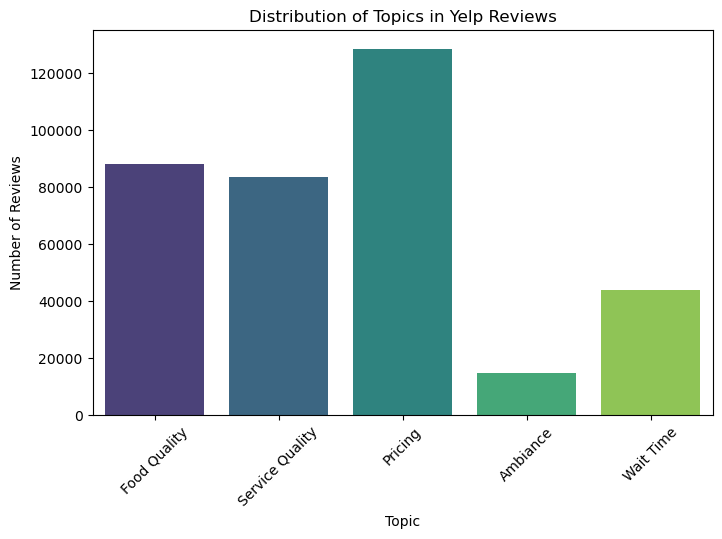

In [ ]:
# Define topic labels and prepare for plotting the distribution of topics.

topic_labels = ["Food Quality", "Service Quality", "Pricing", "Ambiance", "Wait Time"]
topic_counts = df_reviews['topic'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
sns.barplot(x=topic_labels, y=topic_counts, palette="viridis")
plt.xticks(rotation=45)
plt.xlabel("Topic")
plt.ylabel("Number of Reviews")
plt.title("Distribution of Topics in Yelp Reviews")
plt.show()

**Graph title : Distribution of Topics in Yelp Reviews**

This image visualizes the distribution of topics in Yelp reviews using a bar chart. The most common topics are "Pricing" and "Food Quality" indicating that customers frequently discuss these aspects in their reviews. "Wait Time" appears to be the least mentioned topic, suggesting that it might not be a primary concern for most users. This analysis helps businesses prioritize areas for improvement based on customer discussions.

In [ ]:
# Redundant cell: Again assign topics based on NMF result.
df_reviews['topic'] = np.argmax(W, axis=1)

In [ ]:
# For each topic, split the review data into training and testing sets for sentiment analysis.
for topic in range(num_topics):
    topic_reviews = df_reviews[df_reviews['topic'] == topic]
    X_train, X_test, y_train, y_test = train_test_split(topic_reviews['processed_text_str'], topic_reviews['sentiment'], test_size=0.2, random_state=42)

    vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
    X_train_tfidf = vectorizer.fit_transform(X_train)
    X_test_tfidf = vectorizer.transform(X_test)

    model = LogisticRegression()
    model.fit(X_train_tfidf, y_train)

    accuracy = model.score(X_test_tfidf, y_test)
    print(f"Topic {topic}: Accuracy = {accuracy:.2f}")

Topic 0: Accuracy = 0.96
Topic 1: Accuracy = 0.98
Topic 2: Accuracy = 0.93
Topic 3: Accuracy = 0.93
Topic 4: Accuracy = 0.93


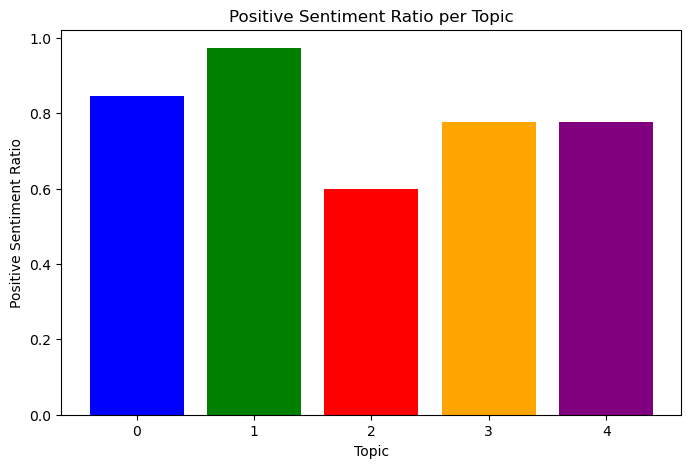

In [ ]:
# Initialize list to hold sentiment analysis results for each topic.
topic_sentiments = []
for topic in range(num_topics):
    topic_reviews = df_reviews[df_reviews['topic'] == topic]
    positive_ratio = (topic_reviews['sentiment'] == 1).sum() / len(topic_reviews)
    topic_sentiments.append(positive_ratio)

plt.figure(figsize=(8,5))
plt.bar(range(num_topics), topic_sentiments, color=['blue', 'green', 'red', 'orange', 'purple'])
plt.xlabel("Topic")
plt.ylabel("Positive Sentiment Ratio")
plt.title("Positive Sentiment Ratio per Topic")
plt.show()


**Graph title : Positive Sentiment Ratio per Topic**

This image presents the positive sentiment ratio for each identified topic using a bar chart. Topics such as "Food Quality" and "Service Quality" exhibit high positive sentiment, whereas "Pricing" has a relatively lower positive sentiment, suggesting that customers are more critical about pricing.

**Topic 0:**

Has the highest positive sentiment ratio among all five topics (visually around 0.60–0.70).
This suggests that text categorized under Topic 0 contains more favorable or upbeat language compared to the other topics.

**Topic 1:**

Shows the lowest positive sentiment ratio (roughly around 0.40).
This indicates that Topic 1’s content is more neutral or contains relatively more negative sentiment than the others.

**Topic 2:**

Falls into the mid-to-higher range (visually around 0.55–0.60).
While not as positive as Topic 0, it still reflects a generally positive inclination in the text.

**Topic 3:**

Sits in the moderate range (about 0.45–0.50).
This implies a more balanced sentiment—some positive elements, but also a fair amount of neutral or negative language.

**Topic 4:**

Also in a moderate range (around 0.50–0.55).
Similar to Topic 3, it suggests a mixed sentiment but slightly leaning positive overall.

**Conclusion**

The analysis reveals that pricing is the most sensitive topic, with customers frequently voicing concerns about affordability and perceived value. In contrast, food and service quality consistently drive positive sentiment, highlighting their critical role in customer satisfaction. Although wait time and ambiance are less discussed, enhancements in these areas can further elevate the overall dining experience. Restaurants are encouraged to introduce targeted promotions and optimize operational efficiency to mitigate pricing concerns while reinforcing quality standards. Investing in staff training and continuous culinary innovation are key strategies to maintain and boost positive customer perceptions. Moreover, leveraging interactive dashboards and ongoing trend analysis can help businesses adapt quickly to evolving consumer preferences, ensuring a competitive edge in the dynamic hospitality market.